In [20]:
import obspy
from obspy.io.segy.core import _read_segy

filename = '/home/dnlab/Data-B/1001-1122/1511994323_1018_50500_16600_20171202_220556_632.sgy'
stream = _read_segy(filename, headonly=True)
print(stream.traces[0].stats)


         network: 
         station: 
        location: 
         channel: 
       starttime: 2017-11-29T22:25:23.000000Z
         endtime: 2017-11-29T22:25:39.000000Z
   sampling_rate: 1000.0
           delta: 0.001
            npts: 16001
           calib: 1.0
            segy: AttribDict({'trace_header': LazyTraceHeaderAttribDict({'unpacked_header': b'\xfa\xff\xff\xff\xfa\xff\xff\xff\xfa\x03\x00\x00\xfa\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00\x07\x00\x04\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\xccB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x80\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xff\xf6\xffM_3\x00\x15\x8a\x8a\x02\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x81>\xe8\x03\x03\x00\x00\x00\x00\x00\x01\x00(\x00H\x03\xe0.\x01\x00,\x01,\x01\x04\x00\x9d\x01\x06\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe1\x07M\x01\x16\x00\x19\x00\x17\x00\x04\x00 }\r

In [31]:
import matplotlib.pyplot as plt
import obspy
import numpy as np

# Load the SEGY file
filename = '/home/dnlab/Data-B/1001-1122/1511994323_1018_50500_16600_20171202_220556_632.sgy'
stream = obspy.read(filename)

# Extract the data and trace header information
data = np.array([trace.data for trace in stream.traces])
npts = stream.traces[0].stats.npts
sampling_rate = stream.traces[0].stats.sampling_rate
starttime = stream.traces[0].stats.starttime

print(data)
print(npts)
print(sampling_rate)
print(starttime)



[[-8.6211255e-03 -8.6097559e-03 -8.6101312e-03 ... -8.6270012e-03
  -8.6304834e-03 -8.6225774e-03]
 [ 4.7923021e+00  1.0675242e+01  9.4782658e+00 ... -1.0837941e-01
   1.0161659e-01 -8.5060950e-03]
 [ 2.6262314e-03  3.3074068e-03  3.3874351e-03 ...  3.0328280e-03
   2.8129078e-03  2.5832215e-03]
 ...
 [ 2.5407210e-06  2.5832412e-06  2.8842585e-06 ...  7.2876214e-06
   7.6792285e-06  6.2379572e-06]
 [ 3.0551371e-06  2.7638655e-06  2.7422345e-06 ...  5.0419499e-06
   4.1835178e-06  4.5364277e-06]
 [-1.5085160e-06 -2.3389075e-06 -3.2011690e-06 ...  3.6909471e-06
   2.0183377e-06  9.0470803e-07]]
16001
1000.0
2017-11-29T22:25:23.000000Z


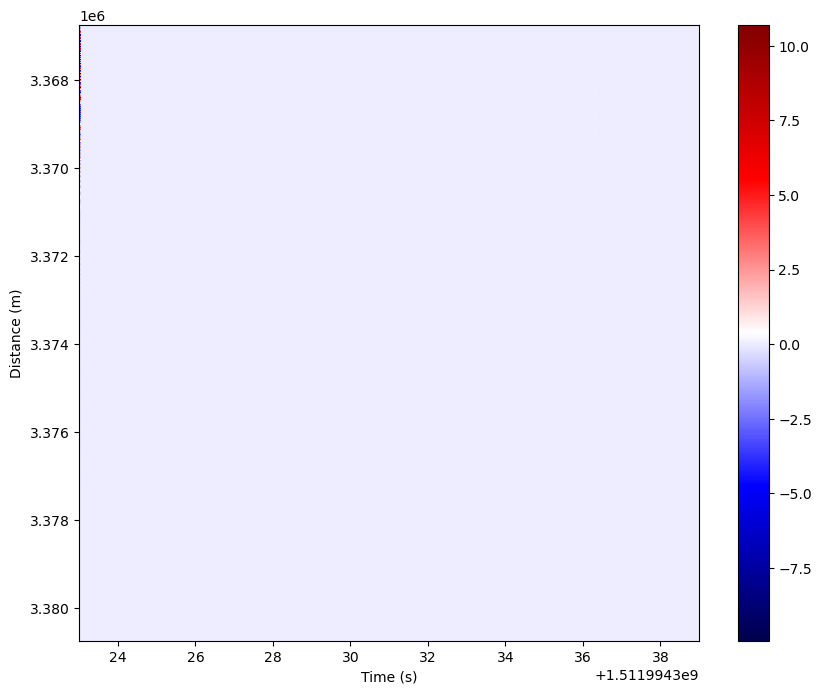

In [38]:
import matplotlib.pyplot as plt
from obspy import read
import numpy as np

# Read in the SEGY file
stream = read(filename, format='segy')

# Extract the data from each trace
data = np.array([trace.data for trace in stream.traces])

# Plot the seismic image
fig = plt.figure(figsize=(10, 8))
plt.imshow(data.T, cmap='seismic', aspect='auto', 
           extent=[starttime.timestamp, (starttime + npts / sampling_rate).timestamp, 
                   stream.traces[-1].stats.segy.trace_header.group_coordinate_x, 
                   stream.traces[0].stats.segy.trace_header.source_coordinate_x])
plt.colorbar()
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.show()


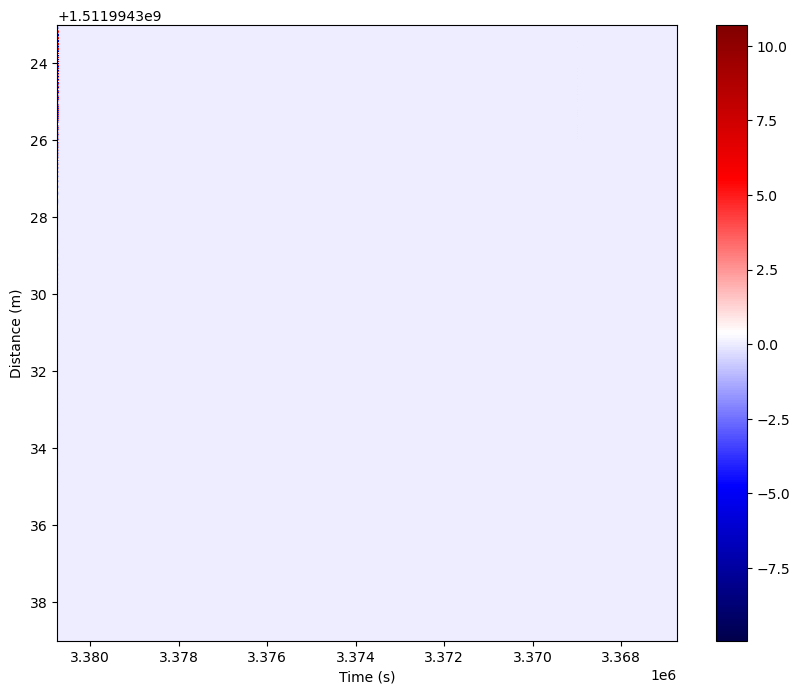

In [39]:
import matplotlib.pyplot as plt
from obspy import read
import numpy as np

# Read in the SEGY file
stream = read(filename, format='segy')

# Extract the data from each trace
data = np.array([trace.data for trace in stream.traces])

# Plot the seismic image
fig = plt.figure(figsize=(10, 8))
plt.imshow(data.T, cmap='seismic', aspect='aplt.imshow(data.T, cmap='seismic', aspect='auto', 
           extent=[starttime.timestamp, (starttime + npts / sampling_rate).timestamp, 
                   stream.traces[-1].stats.segy.trace_header.group_coordinate_x, 
                   stream.traces[0].stats.segy.trace_header.source_coordinate_x])uto', extent=[stream.traces[-1].stats.segy.trace_header.group_coordinate_x, stream.traces[0].stats.segy.trace_header.source_coordinate_x, (starttime + npts / sampling_rate).timestamp, starttime.timestamp])

plt.colorbar()
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.show()
